# Telco Customer Churn Prediction and Model Comparison

## Introduction
Customer churn—the loss of customers over time—is a critical challenge for telecom companies. Predicting which customers are likely to churn enables targeted retention strategies, reduces revenue loss, and improves customer satisfaction.

In this project, we analyze a Telco customer dataset to build predictive models that identify customers at risk of churning. We preprocess the data, handle categorical encoding and feature scaling, and compare the performance of four popular machine learning models: Logistic Regression, Random Forest, LightGBM, and CatBoost.

Evaluation metrics such as Accuracy, Precision, Recall, F1-score, and ROC AUC are used to assess each model's effectiveness. Finally, we visualize model performance and interpret key features driving churn, providing actionable insights for business stakeholders.

## Import essential packages and Load Data

In [35]:
# Essential Packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [36]:

# Load Your Dataset
# Update the path if needed
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Quick Overview
print("Shape of data:", df.shape)
df.head()

Shape of data: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
# Unique values in Churn column
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Data Cleaning

### 1. Fix TotalCharges column
Total charges is supposed to be numeric not object which indicates that some values or not numbers or missing

In [39]:
# Check the problematic rows
df[df['TotalCharges'].str.strip() == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Since 11 rows are detected with no total charges value, we will drop them from the df

In [40]:
# Convert TotalCharges to numeric (forcing errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many were converted to NaN
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

# Drop those rows (or you could impute if needed)
df.dropna(subset=['TotalCharges'], inplace=True)


Missing TotalCharges: 11


### 2. Check for duplicate customer IDs

In [41]:
df['customerID'].duplicated().sum()

0

### 3. Reset index after drop

In [42]:
df.reset_index(drop=True, inplace=True)

### 4. Clean up data types

In [43]:
# Convert SeniorCitizen from 0/1 to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

## Exploratory Data Analysis (EDA)

 ### 1. Basic churn distribution

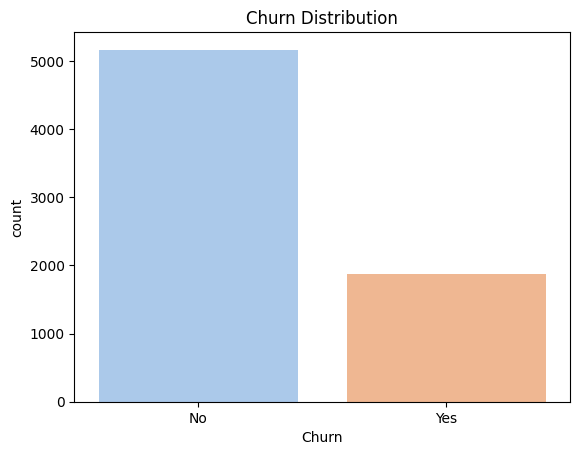

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn count
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.show()

# Percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


### 2. Customer Churn Patterns by Contract, Charges, and Tenure"

   A bar chart showing churn counts by contract type.  
   A boxplot comparing monthly charges between churned and retained customers.  
   A histogram of customer tenure colored by churn status.

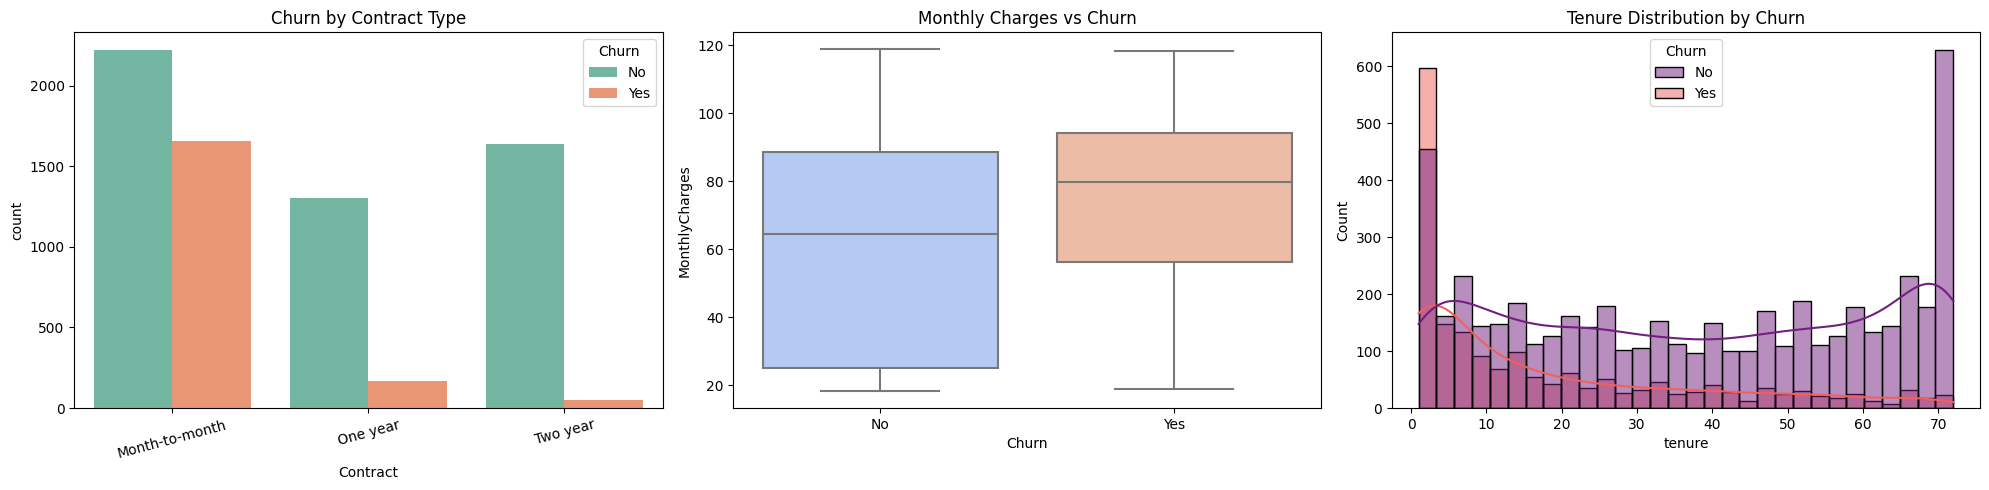

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2', ax=axes[0])
axes[0].set_title('Churn by Contract Type')
axes[0].tick_params(axis='x', rotation=15)

# Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm', ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')

# Tenure Distribution by Churn
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='magma', ax=axes[2])
axes[2].set_title('Tenure Distribution by Churn')

plt.tight_layout()
plt.show()


### 3. Heatmap of Correlation

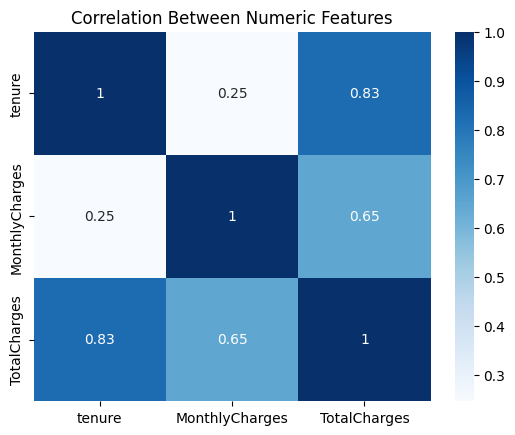

In [46]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numeric Features')
plt.show()

## Data Encoding, Scaling and Splitting

### Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Encode target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Encode binary categorical features (2 unique values)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 3. One-hot encode multi-class categorical features
multi_class_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# 4. Final check
print("Encoding complete. Shape:", df.shape)


Encoding complete. Shape: (7032, 32)


### Spliting & Scaling

In [48]:
from sklearn.model_selection import train_test_split

# Features (drop 'customerID' and 'Churn')
X = df.drop(['customerID', 'Churn'], axis=1)

# Target
y = df['Churn']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Scale numerical features
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

# Fit only on train data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Split complete:")
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Split complete:
Training set: (5625, 30) (5625,)
Test set: (1407, 30) (1407,)


## Models training and prediction

In [49]:
# Imports
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier
import lightgbm as lgb
import contextlib
import os


# 1. Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42, verbose=-1)

# 2. Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
cat.fit(X_train, y_train)

# Suppress LightGBM training output using context manager
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    lgbm.fit(X_train, y_train)

# 3. Predict probabilities
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
cat_probs = cat.predict_proba(X_test)[:, 1]
lgbm_probs = lgbm.predict_proba(X_test)[:, 1]


### Computing models metrics

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a helper function
def get_model_metrics(y_true, y_probs, model_name, threshold=0.5):
    y_pred = (y_probs >= threshold).astype(int)
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_probs)
    }

# Get metrics for each model
results = []
results.append(get_model_metrics(y_test, lr_probs, "Logistic Regression"))
results.append(get_model_metrics(y_test, rf_probs, "Random Forest"))
results.append(get_model_metrics(y_test, lgbm_probs, "LightGBM"))
results.append(get_model_metrics(y_test, cat_probs, "CatBoost"))

# Display as table

metrics_df = pd.DataFrame(results)
metrics_df.set_index("Model", inplace=True)
metrics_df = metrics_df.round(4)  # Round for clarity
display(metrics_df)


,Accuracy,Precision,Recall,F1-score,ROC AUC
Model,,,,,
Logistic Regression,0.8038,0.6485,0.5722,0.6080,0.8361
Random Forest,0.7882,0.6218,0.5187,0.5656,0.8142
LightGBM,0.7854,0.6071,0.5455,0.5746,0.8276
CatBoost,0.7839,0.6101,0.5187,0.5607,0.8281


### ROC Curves

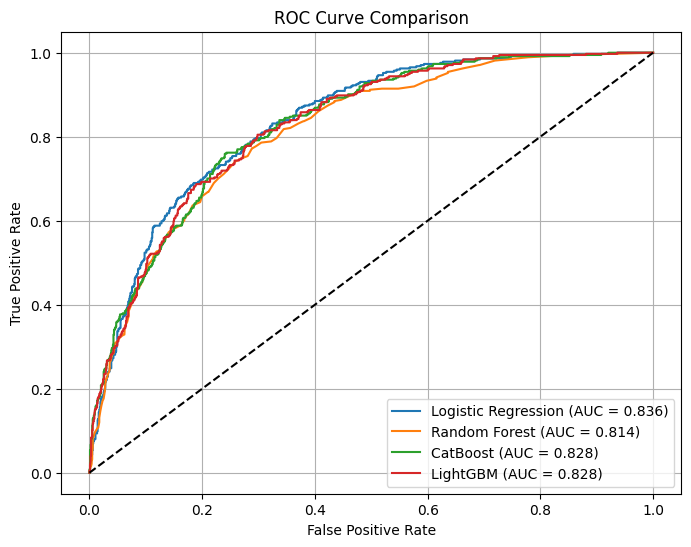

In [51]:
# 6. Plot ROC curves
plt.figure(figsize=(8,6))

models = {
    'Logistic Regression': lr_probs,
    'Random Forest': rf_probs,
    'CatBoost': cat_probs,
    'LightGBM': lgbm_probs
}

for name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrix (per model)  
Shows how many churners were correctly or incorrectly predicted.

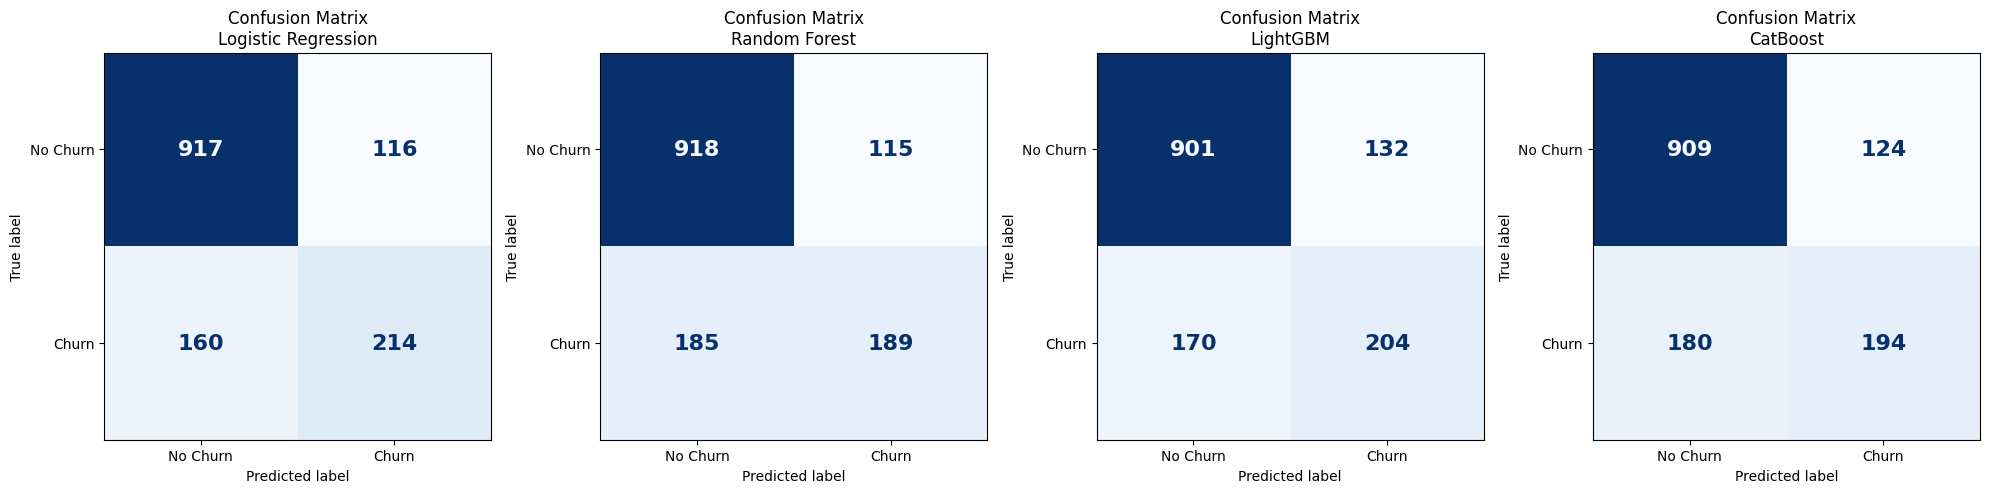

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'LightGBM': lgbm,
    'CatBoost': cat
}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Collect all confusion matrices to find common color scale limits
cms = []
for model in models.values():
    y_pred = model.predict(X_test)
    cms.append(confusion_matrix(y_test, y_pred))

# Find min and max for color scale
vmin = 0
vmax = np.max(cms)

for ax, (name, model), cm in zip(axes, models.items(), cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f'Confusion Matrix\n{name}')
    for text in ax.texts:
        text.set_fontsize(16)
        text.set_weight('bold')
    ax.grid(False)
    
plt.tight_layout()
plt.show()


### Important features in  Logistic regression model  
Which variables are most predictive of churn in the data?

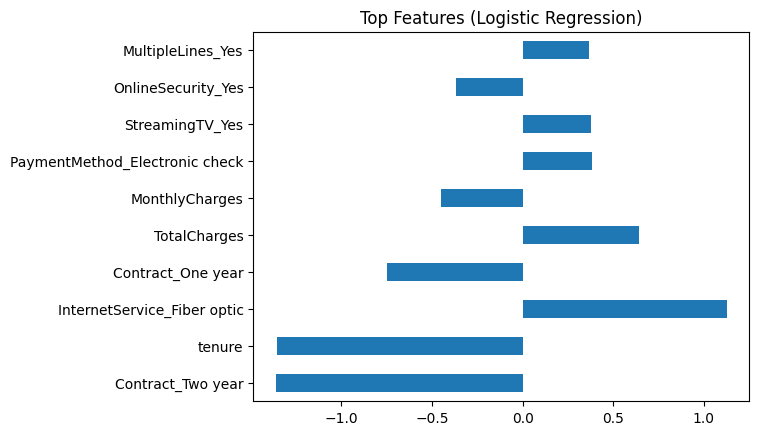

In [74]:
feature_names = X_train.columns
coefs = pd.Series(lr.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
coefs.head(10).plot(kind='barh', title='Top Features (Logistic Regression)')
plt.show()

### Export Model Predictions & Probabilities to CSV

In [57]:
# Extract customerID for the test set rows using their indices
customer_ids = df.loc[X_test.index, 'customerID'].reset_index(drop=True)

# Build results DataFrame with customerID
results_df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Actual_Churn': y_test.reset_index(drop=True),
    'LogisticRegression_Pred': (lr_probs >= 0.5).astype(int),
    'RandomForest_Pred': (rf_probs >= 0.5).astype(int),
    'LightGBM_Pred': (lgbm_probs >= 0.5).astype(int),
    'CatBoost_Pred': (cat_probs >= 0.5).astype(int),
    'LogisticRegression_Prob': lr_probs,
    'RandomForest_Prob': rf_probs,
    'LightGBM_Prob': lgbm_probs,
    'CatBoost_Prob': cat_probs,
})

# Export to CSV for Power BI
results_df.to_csv('churn_model_predictions_with_customerID.csv', index=False)

print("Export complete with CustomerID! File: churn_model_predictions_with_customerID.csv")
results_df.head()


Export complete with CustomerID! File: churn_model_predictions_with_customerID.csv


,CustomerID,Actual_Churn,LogisticRegression_Pred,RandomForest_Pred,LightGBM_Pred,CatBoost_Pred,LogisticRegression_Prob,RandomForest_Prob,LightGBM_Prob,CatBoost_Prob
0,0604-THJFP,0,0,0,0,0,0.018004,0.000,0.008734,0.010822
1,4059-IIEBK,0,1,1,1,1,0.591776,0.660,0.650475,0.615808
2,2228-BZDEE,0,0,0,0,0,0.004918,0.020,0.019313,0.012057
3,2839-RFSQE,1,0,0,0,0,0.200880,0.055,0.091811,0.117071
4,5360-LJCNJ,0,0,0,0,0,0.103465,0.100,0.161035,0.222368


## Conclusion
In this project, we successfully developed and evaluated multiple machine learning models to predict customer churn in a telecom dataset. After thorough data preprocessing, including categorical encoding and feature scaling, we trained and compared the performance of four models:

Logistic Regression  
Random Forest  
LightGBM  
CatBoost  

Based on the evaluation metrics (Accuracy, Precision, Recall, F1-score, and ROC AUC), Logistic Regression emerged as the best-performing model overall, especially in terms of ROC AUC (0.8361) and a balanced F1-score (0.6080). Surprisingly, traditional models like Logistic Regression outperformed more complex ensemble methods, possibly due to the linear nature of churn predictors or the simplicity of the dataset.

### Key Takeaways:
Churn prediction is highly imbalanced, and models must be evaluated using multiple metrics—not just accuracy.  
ROC AUC provides a more holistic view of performance in imbalanced classification problems.  
Feature importance analysis helps uncover the most influential factors driving customer churn.  
Scaling continuous variables such as tenure, MonthlyCharges, and TotalCharges can impact model performance and feature interpretation.